# Projet 3 :  Statistique et informatique

**ALI LAZRAK**\
**SAMUEL KTORZA**

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
%load_ext autoreload
%autoreload 2

# 1 Description du premier modèle

Au temps t = 0, un individu a une probabilité de 0.9 d’être sain et 0.1 d’être infecté.


Un individu dans l’état sain a une probabilité de 0.92 de rester sain et une probabilité de 0.08 de
devenir infecté. Si l’individu est infecté, il peut le rester avec une probabilité de 0.93 et être guéri avec
une probabilité de 0.07. S’il est dans l’état guéri, il reste dans cet état avec une probabilité de 1.

![figure 1](./figure/Exercice1_Figure1.png)*Figure 1 – Diagramme représentant les 3 états du modèles et les probabilités de transition*


In [2]:
etats={0:"S",1:"I",2:"R"}
#S= sains
#I infectes
#R gueris

1. Combien d’états y a t’il ? Quel est la taille du vecteur de probabilité initiale, quelle est la taille de la
matrice de transition ?

    . Il y a 3 états.
    . Puisqu'il y a trois états, la taille du vecteur de probabilité initiale est de 3.
    . La matrice de transition indique les probabilités de passer d'un état à un autre. Étant donné qu'il y a trois états, la matrice de transition sera de taille 3x3.


2. Créez π<sub>0</sub> le vecteur de probabilité initiale.

In [3]:
# Définition du vecteur de probabilité initiale π0
pi_0 = np.array([0.9, 0.1, 0.0])

# Affichage du vecteur π0
print(pi_0)

[0.9 0.1 0. ]


3. Créez la matrice de transition A, la matrice contenant les probabilités de transition entre les différents
états.

In [4]:
matrice_transitions_A = np.zeros((3,3))
matrice_transitions_A[0][0]=0.92
matrice_transitions_A[0][1]=0.08
matrice_transitions_A[1][1]=0.93
matrice_transitions_A[1][2]=0.07
matrice_transitions_A[2][2]=1
print(matrice_transitions_A)

[[0.92 0.08 0.  ]
 [0.   0.93 0.07]
 [0.   0.   1.  ]]


4. Créez une fonction permettant de vérifier qu’une matrice est stochastique et vérifier que A est stochastique.

In [5]:
def verifie_matrice_stochastique(matrice) :
    '''Vérifie si la matrice donnée en argument est stochastique
    @param matrice: la matrice de transitions 
    @return: un booléen True si la matrice est stochastique, False sinon
    '''
    for l in range(0, len(matrice)) :
        somme_ligne = sum(matrice[l])
        
        if (round(somme_ligne,2) != 1) :
            return False
    return np.amax(matrice) <= 1 and np.amin(matrice) >= 0 

#Tests
assert(verifie_matrice_stochastique(matrice_transitions_A)==True)
matrice_test = matrice_transitions_A.copy()
matrice_test[0][0] = 1.5
matrice_test[0][1] = -0.5
assert(verifie_matrice_stochastique(matrice_test)==False)

Nous allons étudier l’évolution du nombre d’individu sains, infectés et guéris au cours du temps,
dans un premier temps nous étudierons la distribution théorique, puis la distribution observée sur des
simulations.

# 1.1 Distribution théorique

On note π<sub>t</sub>, le vecteur de probabilité au temps t.

1. En utilisant π<sub>0</sub> et A, donnez la probabilité pour un individu d’être sain, infecté ou guéri au temps
t = 1 (faire d’abord le calcul à la main).

On se réfère à l'énoncé : Au temps t = 0, un individu a une probabilité de 0.9 d’être sain et 0.1 d’être infecté.\
On obtient le vecteur de la distribution initiale suivant :\
$\pi_0 = (0.9, 0.1, 0)$
On suppose que la chaîne de Markov est homogène. On peut alors écrire :\
$\pi_n = \pi_{n-1} * A$ \
\
Donc $\pi_1 = \pi_0 * A = (0.828, 0.1066, 0.007)$

2. Donnez la probabilité pour un individu d’être sain, infecté ou guéri au temps t = 2 (faire d’abord le calcul à la main).
\


\$\pi_2 = \pi_1 * A = (0.76176, 0.165378, 0.014462)$

3. De même pour chaque temps t entre 1 et 200, calculez la distribution théorique des effectifs dans
chaque état (Rappel πt+1 = πtA )

In [6]:
pi = np.array([0.9, 0.1, 0])
A = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0, 0, 1]])
pi_liste = [pi]

for i in range(1, 201) :
    pi = np.dot(pi, A)
    pi_liste.append(pi)

pi = np.array([0.9, 0.1, 0])

4. Représentez graphiquement la probabilité d’être dans chaque état en fonction du temps. (+ décrivez un peu ce que vous observez)

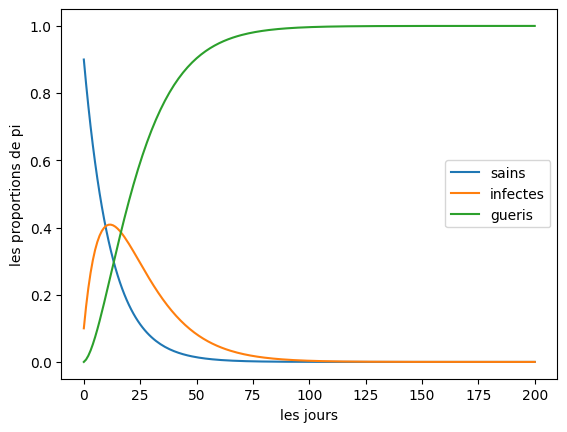

In [7]:
plt.plot(pi_liste)
plt.ylabel('les proportions de pi')
plt.xlabel("les jours")
plt.legend(('sains','infectes','gueris'))
plt.show()

La distribution converge de manière significative vers le temps 100, indiquant que la probabilité d'obtenir la guérison approche rapidement de 1, tandis que les deux autres probabilités tendent vers 0.\
Il est prévisible que, suite à cette convergence, l'ensemble de la population se trouve dans l'état guéri, étant donné que cet état est absorbant.

# 1.2 Distribution observée

**1.2.1 Tirage aléatoire des états**

Créer une fonction permettant de générer une séquence aléatoire de taille T avec cette chaîne de
Markov.\
(Indice : tirer au hasard le premier état en utilisant π0 ; puis tirer au hasard les états suivants
en suivant les probabilités de transition).\
Vous pouvez prendre T = 150.

In [8]:
def generer_sequence_markov(T):
    '''
    Crée une fonction permettant de générer une séquence aléatoire de taille T avec une chaîne de Markov.
    @Param: T (int): Taille de la séquence à générer.
    @Returns: list: Liste représentant la séquence générée.
    '''
    s0 = random.random()
    if s0 < pi[0]:
        s0 = 0
    else:
        s0 = 1
    liste_etats = [s0]
    
    for i in range(1, T):
        etat_prec = liste_etats[i-1]
        ligne_probas = A[etat_prec]
        etat_actuel = random.random()
        
        if etat_actuel < ligne_probas[0]:
            liste_etats.append(0)
        elif etat_actuel < ligne_probas[0] + ligne_probas[1]:
            liste_etats.append(1)
        else:
            liste_etats.append(2)
    
    return liste_etats


In [9]:
A = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0, 0, 1]])
pi_liste = [pi]

liste_etat=generer_sequence_markov(150)
for etat in liste_etat:
            print(etats[etat])

S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R


**1.2.2 Modélisation d’une population**\
Vous avez généré une séquence aléatoire représentant un individu, maintenant vous allez générer une
population de 200 individus.\
Dans cette population :

1. A chaque temps t, comptez le nombre d’individus sains, infectés et guéris dans la population et affichez l’évolution du nombre d’individus dans les trois états en fonction du temps.


In [10]:
def genere_n_personnes(n, show_graph=True, affichage=True, retourne=True):
    '''
    Génère des séquences aléatoires pour un certain nombre d'individus, compte les états à chaque temps, et affiche l'évolution.
    
    @Param:
    n (int): Nombre d'individus.
    show_graph (bool): Indique si le graphique doit être affiché.
    affichage (bool): Indique si les statistiques doivent être affichées.
    retourne (bool): Indique si la liste des séquences aléatoires doit être retournée.
    
    @Returns: list : Liste des séquences aléatoires si retourne est True.
    '''
    # Liste pour stocker l'état de chaque individu
    liste_genere_individus = []

    # Générer les séquences aléatoires pour chaque individu
    for i in range(n):
        liste_genere_individus.append(generer_sequence_markov(150))

    # Liste pour stocker les statistiques moyennes d'état à chaque temps
    liste_moyenne_etat = []

    # Boucle à travers les temps
    for i in range(150):
        etat_temps_i = [0, 0, 0]

        # Boucle à travers les individus pour compter les états à chaque temps
        for j in range(n):
            etats_au_temps_i_de_personne_j = liste_genere_individus[j][i]
            etat_temps_i[etats_au_temps_i_de_personne_j] += 1

        # Affichage des statistiques si affichage est activé
        if affichage:
            print("Au temps " + str(i) + ":\n")
            print("Il y a " + str(etat_temps_i[0] / n * 100) + " pourcent de personnes saines.\n")
            print("Il y a " + str(etat_temps_i[1] / n * 100) + " pourcent de personnes infectées.\n")
            print("Il y a " + str(etat_temps_i[2] / n * 100) + " pourcent de personnes guéries.\n")

        # Ajout des statistiques moyennes à la liste
        liste_moyenne_etat.append(etat_temps_i)

    # Affichage du graphique si show_graph est activé
    if show_graph:
        plt.plot(liste_moyenne_etat)
        plt.xlabel("Les jours")
        plt.ylabel("Le nombre d'individus")
        plt.legend(('Sains', 'Infectés', 'Guéris'))
        plt.show()

    # Retourner la liste des séquences aléatoires si retourne est activé
    if retourne:
        return liste_genere_individus
    return 

2. Affichez le pourcentage d’indivudus sains infectés et guéris en fonction du temps.

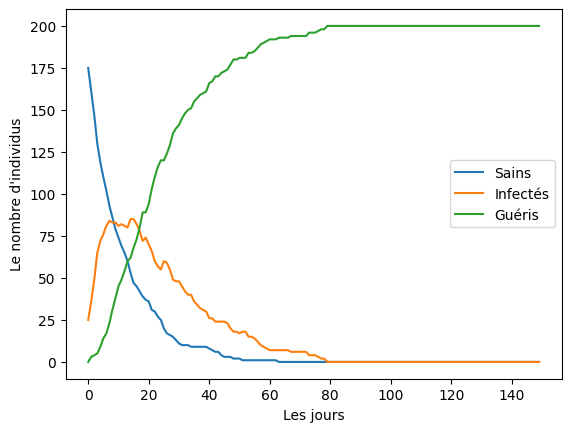

In [11]:
genere_n_personnes(200,True,False, False)

3. Quand t est grand, quelle est la proportion d’individus sains, infectés et guéris ?

In [12]:
#Pour avoir la distrubition des gens infectés dans 200 personnes.
genere_n_personnes(200,False,True,False)

Au temps 0:

Il y a 93.0 pourcent de personnes saines.

Il y a 7.000000000000001 pourcent de personnes infectées.

Il y a 0.0 pourcent de personnes guéries.

Au temps 1:

Il y a 87.5 pourcent de personnes saines.

Il y a 12.0 pourcent de personnes infectées.

Il y a 0.5 pourcent de personnes guéries.

Au temps 2:

Il y a 78.5 pourcent de personnes saines.

Il y a 20.0 pourcent de personnes infectées.

Il y a 1.5 pourcent de personnes guéries.

Au temps 3:

Il y a 74.5 pourcent de personnes saines.

Il y a 23.5 pourcent de personnes infectées.

Il y a 2.0 pourcent de personnes guéries.

Au temps 4:

Il y a 68.5 pourcent de personnes saines.

Il y a 27.0 pourcent de personnes infectées.

Il y a 4.5 pourcent de personnes guéries.

Au temps 5:

Il y a 65.5 pourcent de personnes saines.

Il y a 29.5 pourcent de personnes infectées.

Il y a 5.0 pourcent de personnes guéries.

Au temps 6:

Il y a 62.0 pourcent de personnes saines.

Il y a 30.0 pourcent de personnes infectées.

Il y a 8.0 pour

4. Refaites les questions précédentes avec des populations de tailles différentes, 5 individus et 5000 individus par exemple.

Au temps 0:

Il y a 80.0 pourcent de personnes saines.

Il y a 20.0 pourcent de personnes infectées.

Il y a 0.0 pourcent de personnes guéries.

Au temps 1:

Il y a 80.0 pourcent de personnes saines.

Il y a 20.0 pourcent de personnes infectées.

Il y a 0.0 pourcent de personnes guéries.

Au temps 2:

Il y a 80.0 pourcent de personnes saines.

Il y a 20.0 pourcent de personnes infectées.

Il y a 0.0 pourcent de personnes guéries.

Au temps 3:

Il y a 40.0 pourcent de personnes saines.

Il y a 60.0 pourcent de personnes infectées.

Il y a 0.0 pourcent de personnes guéries.

Au temps 4:

Il y a 40.0 pourcent de personnes saines.

Il y a 40.0 pourcent de personnes infectées.

Il y a 20.0 pourcent de personnes guéries.

Au temps 5:

Il y a 40.0 pourcent de personnes saines.

Il y a 40.0 pourcent de personnes infectées.

Il y a 20.0 pourcent de personnes guéries.

Au temps 6:

Il y a 40.0 pourcent de personnes saines.

Il y a 40.0 pourcent de personnes infectées.

Il y a 20.0 pourcent de pe

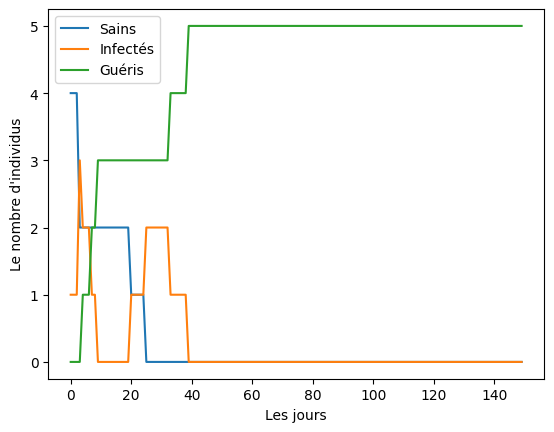

In [13]:
#Pour avoir la distrubition des gens infectés dans 5 personnes + graphe
genere_n_personnes(5, retourne=False)

Au temps 0:

Il y a 89.74 pourcent de personnes saines.

Il y a 10.26 pourcent de personnes infectées.

Il y a 0.0 pourcent de personnes guéries.

Au temps 1:

Il y a 83.24000000000001 pourcent de personnes saines.

Il y a 16.259999999999998 pourcent de personnes infectées.

Il y a 0.5 pourcent de personnes guéries.

Au temps 2:

Il y a 76.64 pourcent de personnes saines.

Il y a 21.7 pourcent de personnes infectées.

Il y a 1.66 pourcent de personnes guéries.

Au temps 3:

Il y a 71.08 pourcent de personnes saines.

Il y a 25.94 pourcent de personnes infectées.

Il y a 2.98 pourcent de personnes guéries.

Au temps 4:

Il y a 65.44 pourcent de personnes saines.

Il y a 29.9 pourcent de personnes infectées.

Il y a 4.66 pourcent de personnes guéries.

Au temps 5:

Il y a 60.419999999999995 pourcent de personnes saines.

Il y a 32.58 pourcent de personnes infectées.

Il y a 7.000000000000001 pourcent de personnes guéries.

Au temps 6:

Il y a 56.06 pourcent de personnes saines.

Il y a 3

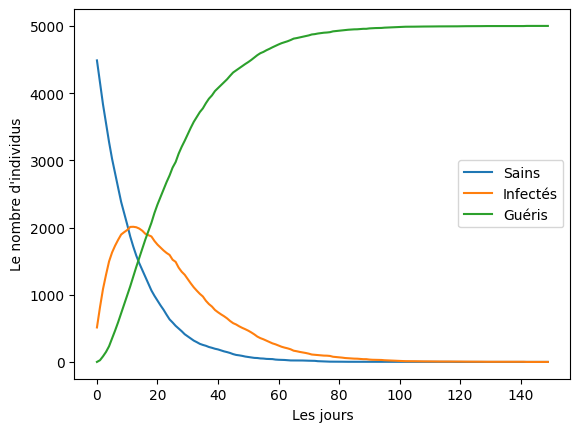

In [14]:
#Pour avoir la distrubition des gens infectés dans 5000 personnes + graphe
genere_n_personnes(5000, retourne=False)

À mesure que la taille de la population dans notre modélisation augmente, la distribution observée se rapproche de plus en plus de la distribution théorique.

**1.3 Longueur de l’infection**
1. À partir des simulations, estimez la longueur moyenne d’une séquence de I.

In [15]:
def longueur_moyenne_infection(n):
    '''
    Estime la longueur moyenne d'une séquence d'infection à partir de simulations.
    
    @Param:n (int): Nombre d'individus.
    @Returns: float: Longueur moyenne d'une séquence d'infection.
    '''
    tab=[]
    count=0
    liste_genere_individu=genere_n_personnes(n,False,False,True)
    # Concaténer toutes les séquences en une seule liste
    list_conca = np.concatenate(liste_genere_individu)
    
    for i in list_conca:
        if i==1:
            count+=1
        else:
            if count !=0:
                tab.append(count)
            count=0

    return np.mean(tab)
            


In [16]:
pi = np.array([0.9, 0.1, 0])
A = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0, 0, 1]])

longueur_moyenne_infection(2500)

14.182

La moyenne de la longueur d'une séquence d'infection pour une population simulée de 2000 individus est d'environ 14, indiquant ainsi une durée moyenne d'infection de 14 jours.

2. Calculez la longueur théorique d’une séquence de I (vous pourrez utiliser l’espérance de la loi géométrique en justifiant).

Soit L un v.a qui represente les I consecutive:

P(L=1)=0.07
P(L=2)=0.93*0.07
P(L=3)=$0.93^2$*0.07
        .
        .
        .
P(L=k)=$0.93^{k-1}$*0.07

ainsi nous avons bien affaire a une loi geometrique

L'espérance de la loi géométrique est définie comme étant égale à 1 divisé par la probabilité p.

Dans ce contexte, avec p égal à 0,07, représentant la probabilité d'être guéri sachant qu'on est infecté\
la formule devient p = p(guéri | infecté) = 0,07.

La longueur de la séquence I est influencée par la probabilité p, car la séquence se termine dès que l'individu est guéri.

Ainsi, la longueur théorique d'une séquence de I est calculée comme 1/0,07\
donnant un résultat d'environ 14,29.

3. Comparer la longueur moyenne observée et la longueur théorique.

La distribution observée de la longueur d'infection laisse penser qu'elle suit une loi géométrique.

4. Afficher la distribution observée de la longueur d’infection (faire un histogramme).

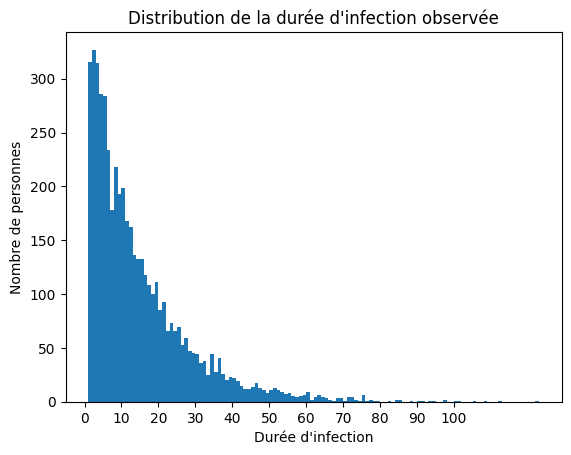

In [17]:
# Génère les séquences aléatoires d'états pour une population donnée
liste_genere_individu = genere_n_personnes(5000, show_graph=False, affichage=False, retourne=True)

# Liste pour stocker la durée d'infection de chaque individu
temps_infecte = [etats_individu.count(1) for etats_individu in liste_genere_individu]

# Crée un histogramme pour visualiser la distribution de la durée d'infection
plt.hist(temps_infecte, bins=np.arange(min(temps_infecte), max(temps_infecte) + 1, 1))
plt.xticks(np.arange(0, 101, step=10))  # Réglage des ticks sur l'axe x pour une meilleure lisibilité
plt.title("Distribution de la durée d'infection observée")
plt.xlabel("Durée d'infection")
plt.ylabel("Nombre de personnes")
plt.show()

5. Affichez et superposer la distribution théorique de la longueur d’infection et la distribution observée.


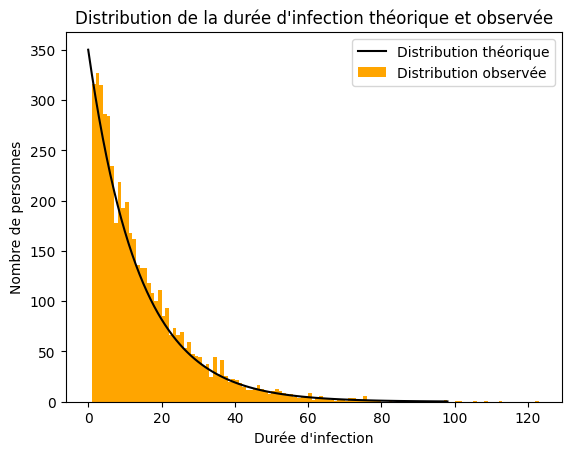

In [18]:
# Liste pour stocker les probabilités théoriques de la durée d'infection
probas_temps_infecte = []

# Calcul des probabilités théoriques pour différentes durées d'infection
for temps in range(1, 100):
    # Calcul de la probabilité théorique pour la durée actuelle
    t_i = 0.93 ** (temps-1) * 0.07
    # Ajout du produit de la probabilité et de la population simulée à la liste
    probas_temps_infecte.append(t_i * 5000)

# Affichage de la distribution théorique
plt.plot(probas_temps_infecte, color="black")
# Affichage de la distribution observée
plt.hist(temps_infecte, bins=np.arange(min(temps_infecte), max(temps_infecte) + 1, 1), color="orange")

# Configurations d'axe et de titre
plt.xlabel("Durée d'infection")
plt.ylabel("Nombre de personnes")
plt.title("Distribution de la durée d'infection théorique et observée")
plt.legend(["Distribution théorique", "Distribution observée"])


plt.show()



La superposition graphique démontre de manière évidente une proximité marquée entre la distribution observée et la distribution théorique. Par conséquent, la modélisation de la durée d'infection par une loi géométrique est pertinente.

**1.4 Apprentissage des paramètres du modèle à partir de données**

Vous allez maintenant utiliser les séquences que vous avez généré, pour estimer les paramètres du
modèle.

1. A partir d’une séquence d’observation (donc un individu), estimez de la matrice de probabilité de transitions.
2. Même question avec 10 individus, 100 individus, ect.

In [19]:
def estimer_matrice_transition(n):
    '''
    Estime la matrice de probabilité de transitions à partir de simulations.

    @Params: n (int): Nombre d'individus.
    @Returns: np.ndarray: Matrice de probabilité de transitions.
    '''
    # Générer les séquences aléatoires pour n individus
    sequences_observation = genere_n_personnes(n, show_graph=False, affichage=False, retourne=True)

    # Initialiser une matrice de transition avec des zéros
    matrice_transition = np.zeros((3, 3))

    # Compter le nombre total de transitions
    total_transitions = 0

    # Parcourir les séquences d'observation et compter les transitions entre états successifs
    for sequence_observation in sequences_observation:
        for i in range(len(sequence_observation) - 1):
            etat_actuel = sequence_observation[i]
            etat_suivant = sequence_observation[i + 1]
            matrice_transition[etat_actuel][etat_suivant] += 1

    # Normaliser les comptes pour obtenir les probabilités
    for i in range(0,len(matrice_transition)):
        matrice_transition[i] /= sum(matrice_transition[i])

    return matrice_transition


In [20]:
A = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0, 0, 1]])
pi_liste = [pi]


matrice1=estimer_matrice_transition(1)
matrice10=estimer_matrice_transition(10)
matrice100=estimer_matrice_transition(100)
matrice150=estimer_matrice_transition(150)


print(" estimation de la matrice de probabilité apartir d'une sequence d'un individue")
print(matrice1)
print()
print(" estimation de la matrice de probabilité apartir d'une sequence de 10 individues")
print(matrice10)
print()
print(" estimation de la matrice de probabilité apartir d'une sequence de 100 individues")
print(matrice100)
print(" estimation de la matrice de probabilité apartir d'une sequence de 150 individues")
print(matrice150)


 estimation de la matrice de probabilité apartir d'une sequence d'un individue
[[0.98113208 0.01886792 0.        ]
 [0.         0.96153846 0.03846154]
 [0.         0.         1.        ]]

 estimation de la matrice de probabilité apartir d'une sequence de 10 individues
[[0.94705882 0.05294118 0.        ]
 [0.         0.9378882  0.0621118 ]
 [0.         0.         1.        ]]

 estimation de la matrice de probabilité apartir d'une sequence de 100 individues
[[0.9232     0.0768     0.        ]
 [0.         0.93243243 0.06756757]
 [0.         0.         1.        ]]
 estimation de la matrice de probabilité apartir d'une sequence de 150 individues
[[0.90596491 0.09403509 0.        ]
 [0.         0.9334221  0.0665779 ]
 [0.         0.         1.        ]]


3. Combien de séquences sont nécessaires pour approximer correctement le modèle

Pour obtenir une approximation correcte de ce modèle, il est nécessaire d'utiliser environ 150 séquences afin d'obtenir une bonne précision dans l'approximation.

**Petites modifications autour de ce premier modèle**

1. la taille de la population ;

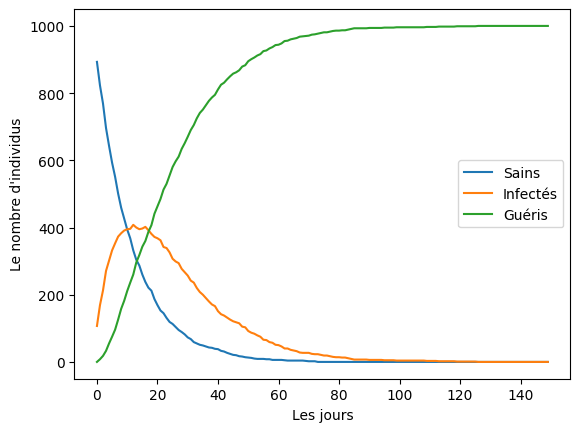

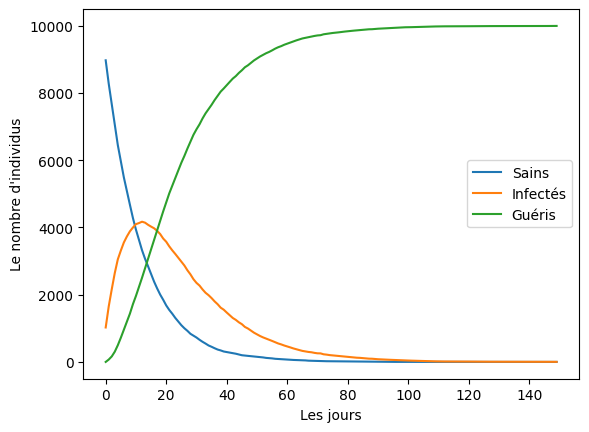

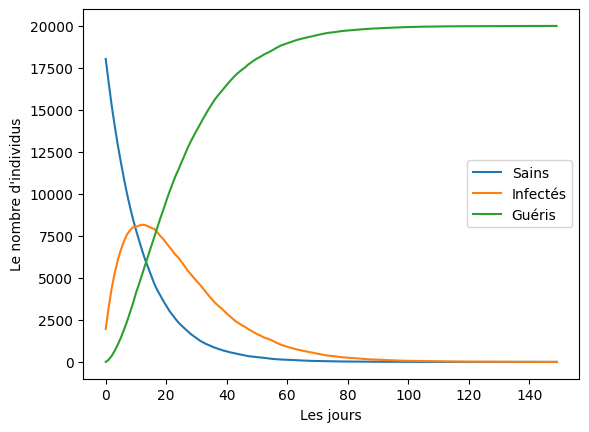

In [21]:
genere_n_personnes(1000,True,False,False)
genere_n_personnes(10000,True,False,False)
genere_n_personnes(20000,True,False,False)

Les graphiques ci-dessus révèlent clairement que la taille d'une population a une influence sur le nombre, mais pas sur la **proportion** de personnes saines, infectées et guéries :\
les trois courbes conservent la même tendance pour des valeurs de `n` supérieures à 50.\
Évidemment, avec des valeurs de `n` plus petites (par exemple, `n = 5`), les courbes peuvent prendre des directions différentes, mais les proportions d'individus dans chaque catégorie demeurent toutefois respectées dans une certaine mesure.

2. la distribution de probabilité initiale.

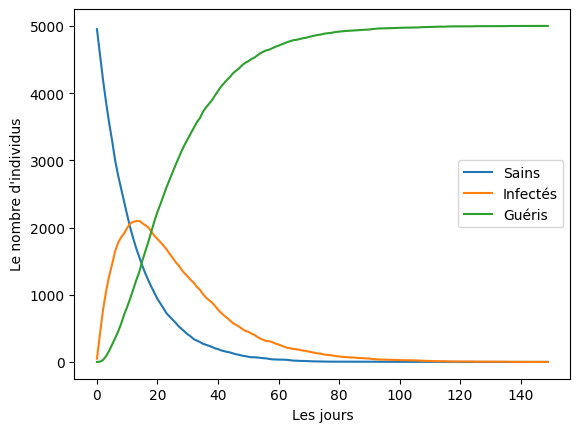

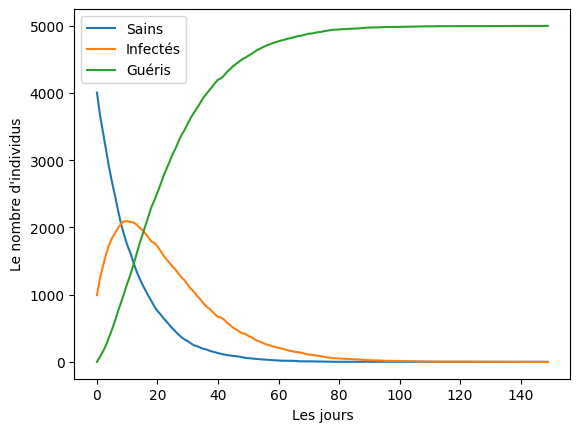

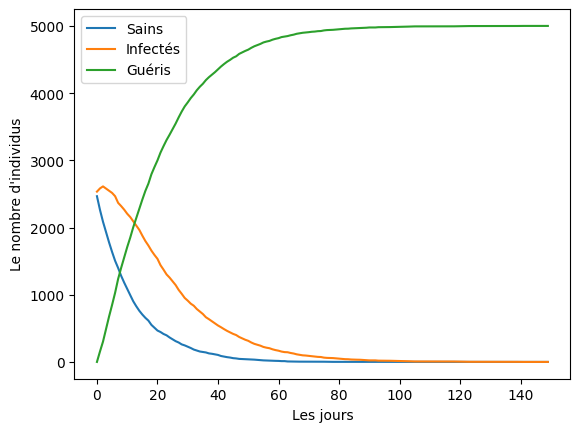

In [22]:
pi=np.array([0.99,0.01,0])
genere_n_personnes(5000,True,False,False)

pi= np.array([0.8,0.2,0])
genere_n_personnes(5000,True,False,False)

pi= np.array([0.5,0.5,0])
genere_n_personnes(5000,True,False,False)

Changer la distribution de probabilité initiale n'a pas vraiment d'incidence sur la convergence. Peu importe la distribution initiale, la simulation atteint toujours finalement la convergence vers la distribution théorique, suggérant ainsi que la chaîne de Markov est **ergodique**.

3. les probabilités de transition.

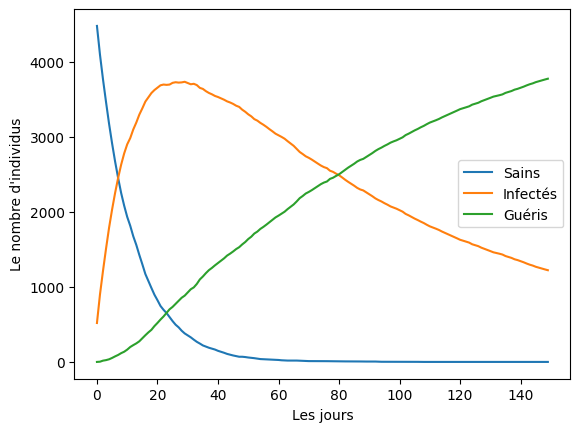

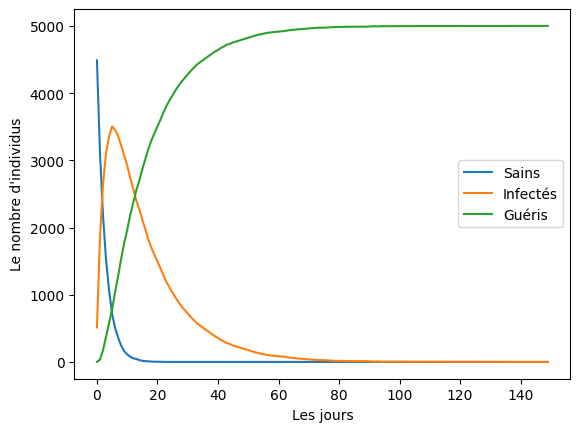

In [23]:
pi=np.array([0.9,0.1,0])
# On diminue la proportion de devenir guéri en étant infecté
A=np.array([[0.92, 0.08, 0],[0, 0.99, 0.01],[0, 0, 1]])
genere_n_personnes(5000,True,False,False)

# On augmente la probabilité de devenir infecté en étant sain
A=np.array([[0.7, 0.3, 0],[0, 0.93, 0.07],[0, 0, 1]])
genere_n_personnes(5000,True,False,False)

On voit que changer les probabilités de transition peut altérer la vitesse de convergence ou même la distribution vers laquelle la simulation converge.

# 2 Description du second modèle

Nous allons maintenant considérer un second modèle, les individus guéris peuvent redevenir sains avec
une probabilité de 0.02.\
Ils-elles peuvent perdre leur immunité face à la maladie.

![figure 6](./figure/Exercice2_Figure6.png)*Figure 6 – Diagramme représentant les 3 états du modèles et les probabilités de transition*

# 2.1 Analyse du modèle

1. Ce processus peut-il être modélisé par une chaîne de Markov ?

Oui, on peut représenter ce processus à l'aide d'une chaîne de Markov :\
a) Le processus est homogène, ce qui signifie qu'il maintient les probabilités indépendamment du temps.\
b) Il comporte 3 états, donc le nombre d'états est fini.\
c) L'état au temps t+1 dépend uniquement de l'état au temps t.

2. Donnez la nouvelle matrice de transition


In [24]:
A = np.array([[0.92, 0.08, 0],
            [0, 0.93, 0.07],
            [0.02, 0, 0.98]])
print("la nouvelle matrice de transition:")
print(A)


la nouvelle matrice de transition:
[[0.92 0.08 0.  ]
 [0.   0.93 0.07]
 [0.02 0.   0.98]]


3. Quelle est la nature des états de cette chaîne de Markov ? Est-elle périodique ? Est-elle irréductible ?

Elle est **apériodique** en raison de la présence de cycles dans le graphe.\
Elle est également **irréductible**, puisque tous les états sont communicants.

4. Calculez la matrice A2 = A×A. A quoi correspond-elle ? Est-elle stochastique ? Même question pour A3, A4, etc (attention).

La matrice $A^2$ correspond à la matrice de transition au temps t+2. Avec cette matrice on peut avoir une chaine Markov d'ordre 2.\
La matrice $A^3$ correspond à la matrice de transition au temps t+3. Avec cette matrice on peut avoir une chaine Markov d'ordre 3.\
La matrice $A^4$ correspond à la matrice de transition au temps t+4. Avec cette matrice on peut avoir une chaine Markov d'ordre 4.

In [25]:
A_2=np.dot(A,A)
A_3=np.dot(A,A_2)
A_4=np.dot(A,A_3)


assert(verifie_matrice_stochastique(A)==True)
assert(verifie_matrice_stochastique(A_2)==True)
assert(verifie_matrice_stochastique(A_3)==True)
assert(verifie_matrice_stochastique(A_4)==True)

Les Matrice $A^2$,$A^3$,$A^4$ sont bien stochastique.

5. Réalisez les nouvelles simulations. Comment la population évolue-t-elle ?

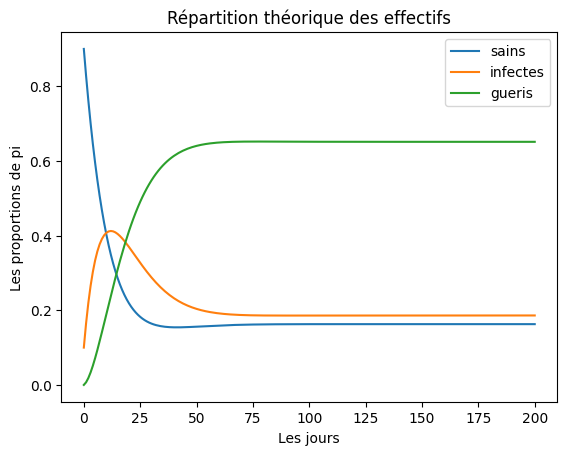

[0.16279069 0.18604655 0.65116277]


In [26]:
# Initialisation des paramètres
pi = np.array([0.9, 0.1, 0])
pi_liste = [pi]

# Probabilité de réversion des individus guéris vers un état sain
prob_reversion_gueris_sains = 0.02

# Simulation pour 200 jours
for i in range(1, 201):
    # Mise à jour de la probabilité de réversion
    A[2, 0] = prob_reversion_gueris_sains

    # Mise à jour de la distribution des états
    pi = np.dot(pi, A)
    
    # Ajout de la nouvelle distribution à la liste
    pi_liste.append(pi)

# Affichage de l'évolution théorique des effectifs
plt.plot(pi_liste)
plt.title('Répartition théorique des effectifs')
plt.ylabel("Les proportions de pi")
plt.xlabel("Les jours")
plt.legend(('sains','infectes','gueris'))
plt.show()
print(pi_liste[-1])
distribution_stat_mod2=pi_liste[-1]

En effectuant des simulations avec la même distribution de probabilité initiale que précédemment et en utilisant les probabilités de transition du second modèle, il devient évident que la répartition théorique des effectifs diffère de celle du premier modèle. Elle se stabilise autour du jour \(t+60\) avec un peu plus de 60% de personnes guéries, près de 20% d'infectées, et un peu moins de 20% de personnes saines.

Avec ce nouveau modèle, on observe qu'il n'existe jamais d'instant où l'ensemble de la population est entièrement guérie. Il y a toujours une fraction de la population contaminée et une autre fraction non immunisée à la maladie. Ce résultat était anticipé en raison de l'introduction d'une probabilité de 2% de passer de l'état guéri à l'état sain, symbolisant une perte d'immunité. L'état guéri n'est plus **absorbant**, donc une partie des effectifs se déplace vers les états sains et infectés, maintenant un équilibre dynamique.

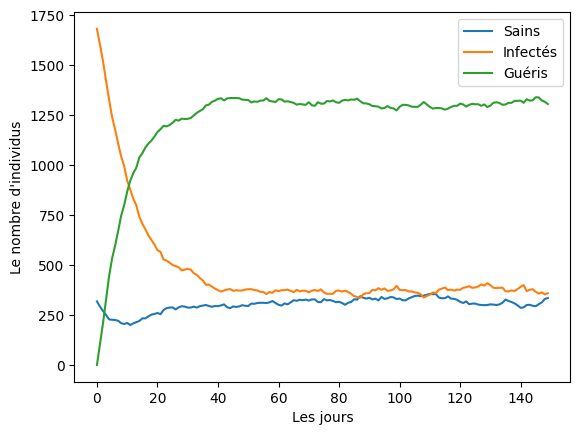

In [27]:
genere_n_personnes(2000, True, False, False)

La distribution observée sur un échantillon de 2000 personnes concorde avec la distribution théorique donnée plus haut.\
Après t+60, un peu plus de 60% des personnes sont guéries, près de 20% sont infectées et près de 20% saines.

6. Refaites les simulations avec d’autres distributions de proba initiales et comme pour chaque question commentez vos observations.

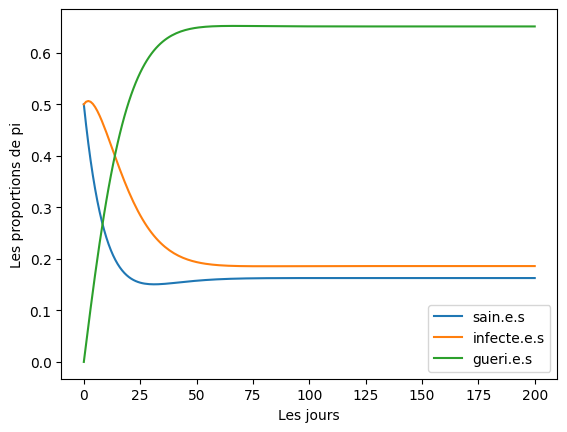

In [28]:
#Simulation avec 50% d'infectés et 50% de sains
pi = np.array([0.5, 0.5, 0])
A = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
pi_liste = [pi]
for i in range(1, 201) :
    pi = np.dot(pi, A)
    pi_liste.append(pi)

plt.plot(pi_liste)
plt.legend(('sain.e.s','infecte.e.s','gueri.e.s'))
plt.ylabel("Les proportions de pi")
plt.xlabel("Les jours")
plt.show()

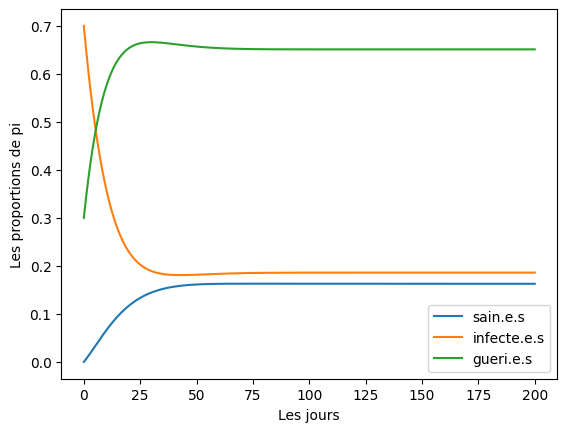

In [29]:
#Simulation avec 70% d'infectés et 30% de guéris
pi = np.array([0, 0.7, 0.3])
A = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
pi_liste = [pi]
for i in range(1, 201) :
    pi = np.dot(pi, A)
    pi_liste.append(pi)

plt.plot(pi_liste)
plt.legend(('sain.e.s','infecte.e.s','gueri.e.s'))
plt.ylabel("Les proportions de pi")
plt.xlabel("Les jours")
plt.show()
pi = np.array([0.9, 0.1, 0])


Indépendamment de la distribution de probabilité initiale, la distribution théorique présente une tendance à se stabiliser autour des mêmes proportions : un peu plus de 60% de guéris, près de 20% d'infectés, et un peu moins de 20% de sains. La chaîne de Markov est qualifiée d'ergodique, ce qui signifie qu'elle converge vers une distribution stationnaire indépendamment de la distribution initiale.
Les propriétés fondamentales qui confèrent à cette chaîne de Markov son caractère ergodique sont les suivantes : Irréductibilité,Apériodicité,Récurrence positive

7. Calculez la distribution de probabilité stationnaire et comparez ce résultat avec les simulations pour t assez grand.

Étant donné que la chaîne de Markov est ergodique, la séquence de probabilités $(\pi^{(n)})_{n \in \mathbb{N}}$ converge vers $\pi^*$, la distribution stationnaire, indépendamment de la distribution initiale $\pi^0$. La distribution stationnaire $\pi^*$ satisfait les équations suivantes :
\[ \begin{cases}
 \pi^* = \pi^* * A\\
 \pi^* \cdot \mathbf{1} = 1\\
\end{cases} \]

Cela se traduit par le système d'équations suivant :
\[ \begin{cases} 
a = 0.92a + 0.02c \\
b = 0.08a + 0.93b \\
c = 0.07b + 0.98c \\
a + b + c = 1
\end{cases} \]

En résolvant ce système, nous obtenons la distribution stationnaire :\
$\pi^*$ = \($\frac{7}{43}$, $\frac{8}{43}$, $\frac{28}{43}$), soit environ 16.28% de sains, 18.6% d'infectés, et 65.12% de guéris. Ces résultats correspondent avec ceux des simulations antérieures qui se stabilisent autour de ces valeurs.

# 2.2 Longueur de l’immunité

On peut se demander combien de temps un individu qui a été malade, reste protégé contre la maladie.

1. À partir des simulations, estimez la longueur moyenne d’une séquence de R


In [146]:
def longueur_moyenne_guerison(n):
    '''
    Estime la longueur moyenne d'une séquence d'infection à partir de simulations.
    
    @Param:n (int): Nombre d'individus.
    @Returns: (float) : Longueur moyenne d'une séquence d'infection.
    '''

    # Générer les séquences aléatoires pour n individus
    liste_genere_individu = genere_n_personnes(n, show_graph=False, affichage=False, retourne=True)
    
    # Initialiser les compteurs de longueur de séquence de guérison et nombre de transitions
    count = 0
    div = 0

    # Parcourir chaque séquence générée
    for s in liste_genere_individu:
        prec = -1  # Stocker l'état précédent, initialisé à une valeur non pertinente
        for etat in s:
            if etat == 2:
                count += 1  # Incrémenter la longueur de la séquence de guérison
                
            elif prec == 2:
                div += 1  # Incrémenter le nombre de transitions (sortie de l'état guéri)
                
            prec = etat  # Mettre à jour l'état précédent
            
    return count/div  # Retourner la longueur moyenne de la séquence de guérison


In [147]:
pi=[0.9,0.1,0]
A = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
moyenne = longueur_moyenne_guerison(10000)


50.13234774413947

2. Calculez la longueur théorique d’une séquence de R

La longueur moyenne théorique d'une séquence d'état 'R' est calculée comme l'inverse de la probabilité de quitter l'état 'R', soit $\frac{1}{1 - P_{RR}}$, équivalente à $\frac{1}{0.02}$ = 50 \
Ainsi, la longueur moyenne théorique d'une séquence de l'état 'R' est de 50.


3. Affichez la distribution théorique et la distribution observée de la longueur de l’immunité .

In [210]:
def variance_longueur_immunite(n):
    # Générer les séquences aléatoires pour n individus
    liste_genere_individu = genere_n_personnes(n, show_graph=False, affichage=False, retourne=True)
    
    # Concaténer toutes les séquences en une seule liste
    sequences_concatenees = np.concatenate(liste_genere_individu)
    
    # Initialiser une liste pour stocker les longueurs des séquences de guérison
    longueurs_guerison = []
    
    # Initialiser les compteurs de longueur de séquence de guérison et nombre de transitions
    count = 0
    prec = -1
    
    # Parcourir la séquence concaténée
    for etat in sequences_concatenees:
        if etat == 2:
            count += 1
        elif prec == 2 and etat != 2:    
            longueurs_guerison.append(count)
            count = 0
        prec = etat
    
    # Calculer la variance des longueurs des séquences de guérison
    variance = np.var(longueurs_guerison)
    
    return variance  # Retourner la variance des longueurs des séquences de guérison



In [211]:
cavariance_longueur_immunite(10000)


1026.6671805675094

In [ ]:
densite_probabilite = norm.pdf(x, 50, math.sqrt(var))

# Tracer la courbe de densité de probabilité
plt.plot(x, densite_probabilite, 'r', label='Théorique')

# Ajouter des légendes et un titre
plt.legend()
plt.title('Distribution observée et théorique de la longueur de l\'immunité')
plt.xlabel('Longueur de l\'immunité')
plt.ylabel('Densité de probabilité')

# Afficher le graphique
plt.show()

# 2.3 Modifier le modèle
1. Comment l’épidémie évolue-t-elle si vous modifiez la probabilité pour un individu sain de devenir infecté ? Quelle est la nouvelle distribution a l’équilibre ?

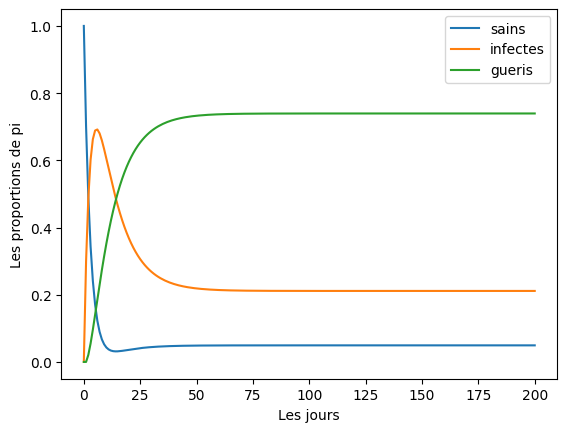

[0.04929577 0.21126761 0.73943662]


In [33]:
#Simulation avec 100% de sains au départ et une probabilité 30% pour un individu sain de devenir infecté
pi = np.array([1, 0, 0])
A = np.array([[0.7, 0.3, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
pi_liste = [pi]
for i in range(1, 201) :
    pi = np.dot(pi, A)
    pi_liste.append(pi)

plt.plot(pi_liste)
plt.legend(('sains','infectes','gueris'))
plt.ylabel("Les proportions de pi")
plt.xlabel("Les jours")
plt.show()
print(pi_liste[-1])

2. Même question si vous changez la probabilité pour un individu guéri de redevenir sain.

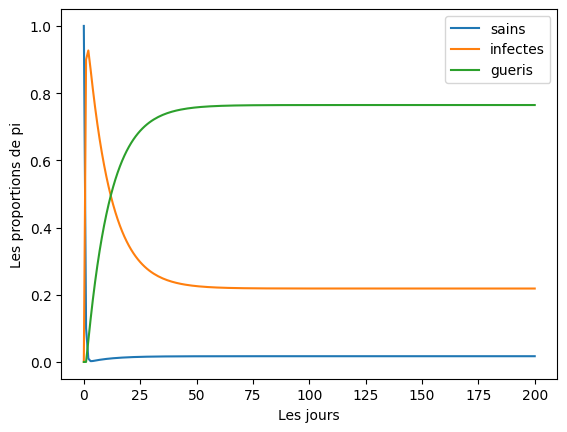

[0.01699029 0.21844661 0.7645631 ]


In [34]:
#Simulation avec 100% de sains au départ et une probabilité 90% pour un individu sain de devenir infecté
pi = np.array([1, 0, 0])
A = np.array([[0.1, 0.9, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
pi_liste = [pi]
for i in range(1, 201) :
    pi = np.dot(pi, A)
    pi_liste.append(pi)

plt.plot(pi_liste)
plt.legend(('sains','infectes','gueris'))
plt.ylabel("Les proportions de pi")
plt.xlabel("Les jours")
plt.show()
print(pi_liste[-1])

Lorsque la probabilité qu'un individu sain soit infecté augmente, il est clair que la croissance du nombre d'infections connaît une explosion, et le pic d'infection atteint des niveaux plus élevés.\
Une fois ce pic atteint, le déclin des cas d'infection est d'autant plus abrupt.\
De plus, on observe une chute significative du nombre d'individus sains dès que la distribution atteint un équilibre, au profit des effectifs d'individus guéris et infectés.

En d'autres termes, à mesure que la contagiosité de la maladie augmente, le pic d'infection devient plus élevé et de courte durée.\
Lorsque le modèle se stabilise, la proportion d'individus guéris augmente, tandis que celle des individus sains diminue. Pour stopper la progression de l'épidémie, il est nécessaire d'augmenter l'immunité au sein d'une plus grande partie de la population.

# 3 Vaccination
Nous supposons qu’une partie de la population a été vaccinée. Voici la nouvelle matrice des probabilités
de transitions chez les individus vaccinés.

![figure 7](./figure/Exercice3_Figure7.png)*Figure 7 – Diagramme représentant les 3 états du modèles et les probabilités de transition*

In [35]:
MatriceVaccin = np.array([[0.9 , 0.01, 0.09], [0. , 0.8 , 0.2 ], [0.02, 0. , 0.98]])
print(MatriceVaccin)

[[0.9  0.01 0.09]
 [0.   0.8  0.2 ]
 [0.02 0.   0.98]]


Plusieurs changements peuvent être observés dans ce processus :
- L'état S (sain) a une probabilité de 0.9 de rester sain, de 0.09 de devenir immunisé, et de 0.01 de passer à l'état infecté.
- L'état I (infecté) a une probabilité de 0.8 de rester infecté et de 0.2 de passer à l'état immunisé.
- L'état R (immunisé/guéris) ne change pas avec une probabilité de 0.98 de rester immunisé et de 0.02 de passer à l'état sain.

Ce processus peut toujours être représenté à l'aide d'une chaîne de Markov, caractérisée par :\
a) Le processus est homogène, ce qui signifie qu'il maintient les probabilités indépendamment du temps.\
b) Il comporte 3 états, donc le nombre d'états est fini.\
c) L'état au temps t+1 dépend uniquement de l'état au temps t.


la nouvelle matrice de transition est: 
- **apériodique** en raison de la présence de cycles dans le graphe.\
- **irréductible**, puisque tous les états sont communicants.

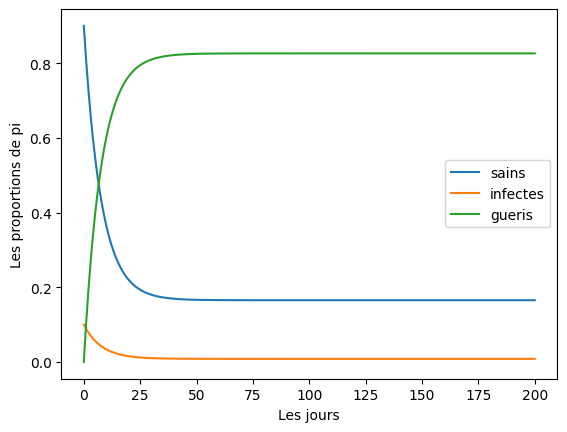

[0.16528926 0.00826446 0.82644628]


In [36]:
#Simulation avec distribution de base (0.9,0.1,0)
pi = np.array([0.9, 0.1, 0])
A = np.array(MatriceVaccin)
pi_liste = [pi]
for i in range(1, 201) :
    pi = np.dot(pi, A)
    pi_liste.append(pi)

plt.plot(pi_liste)
plt.legend(('sains','infectes','gueris'))
plt.ylabel("Les proportions de pi")
plt.xlabel("Les jours")
plt.show()
print(pi_liste[-1])
distribution_stat_mod3=pi_liste[-1]

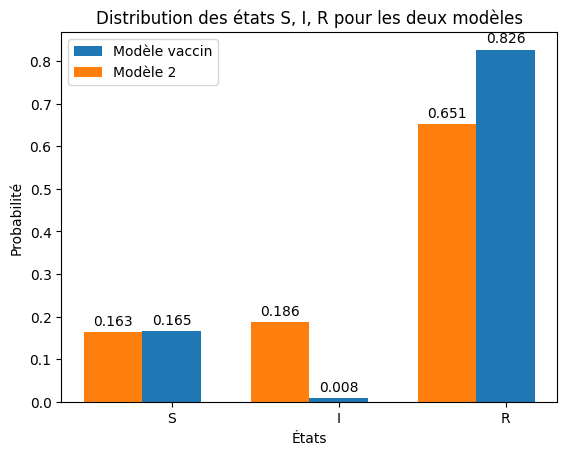

In [37]:
# Barres pour le modèle 3
bar_width = 0.35
index_mod3 = np.arange(len(distribution_stat_mod3))
plt.bar(index_mod3, distribution_stat_mod3, width=bar_width, label='Modèle vaccin', align='center')

# Barres pour le modèle 2
index_mod2 = index_mod3 - bar_width
plt.bar(index_mod2, distribution_stat_mod2, width=bar_width, label='Modèle 2', align='center')

# Ajouter les valeurs au-dessus des barres avec trois décimales
for i, value in enumerate(distribution_stat_mod3):
    plt.text(index_mod3[i], value + 0.01, f'{value:.3f}', ha='center', va='bottom')

for i, value in enumerate(distribution_stat_mod2):
    plt.text(index_mod2[i], value + 0.01, f'{value:.3f}', ha='center', va='bottom')

# Personnalisation du graphique
plt.xlabel('États')
plt.ylabel('Probabilité')
plt.title('Distribution des états S, I, R pour les deux modèles')
plt.xticks(index_mod3, ['S', 'I', 'R'])
plt.legend()

# Afficher le graphique
plt.show()

Nous pouvons clairement observer que la distribution stationnaire de l'état I est significativement plus basse pour le modèle vaccin que pour le modèle 2.\
De plus, on remarque également une proportion bien plus élevée d'individus immunisés dans le modèle vaccin.\
Ces observations soulignent l'efficacité du vaccin par rapport au modèle 2, indiquant une réduction significative des infections et une augmentation de l'immunité au sein de la population.

# 3.2 Classification

Nous avons suivi un individu et observé cette séquence : 

In [38]:
individue_suivie= [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

1. Évaluez la probabilité d’obtenir cette séquence sachant le modèle 2 ?

In [39]:
def probabilite_sequence(sequence, matrice_transition, distribution_initiale):
    """
    Calcule la probabilité d'observer une séquence selon un modèle de chaîne de Markov.

    @Param: sequence (list): La séquence d'états observée.
            matrice_transition (np.ndarray): La matrice de transition du modèle.
            distribution_initiale (np.ndarray): La distribution initiale des états.

    @Returns: float: La probabilité de la séquence.
    """
    probabilite = distribution_initiale[sequence[0]]

    for i in range(1, len(sequence)):
        probabilite *= matrice_transition[sequence[i-1], sequence[i]]
    return probabilite

In [40]:
A = np.array([[0.92, 0.08, 0],
            [0, 0.93, 0.07],
            [0.02, 0, 0.98]])

probabilite_sequence(individue_suivie,A,pi)

2.6791694307708287e-11

2. Évaluez la probabilité d’obtenir cette séquence sachant le modèle vaccin.

In [41]:
pi = np.array([0.9, 0.1, 0])
probabilite_sequence(individue_suivie,MatriceVaccin,pi)

1.4200531482213664e-12

Partant du principe que la séquence donnée appartient à un individu dans une population où la distribution des personnes infectées est de 0.1%, les probabilités obtenues (1.4588e-10 pour un individu sans vaccin et 1.42e-12 pour un individu vacciné) représentent la probabilité que la séquence observée corresponde au modèle respectif (sans vaccin ou avec vaccin) pour cet individu.\
Ces valeurs extrêmement faibles soulignent la rareté de la séquence spécifique dans le contexte de chaque modèle, et elles peuvent être interprétées comme la probabilité que l'individu suive le modèle considéré.
Ainsi il est plus probale que l'individu suivent le modele 2.

# 4 Confinement
Imaginons qu’il n’y ait pas de vaccins disponibles, dans ce cas des mesures de distanciation sociale
sont mises en place, la probabilité de devenir infecté devient nulle.


1. Nous allons alterner entre les périodes de non distanciation et de distanciation.
    1. En période de non-confinement, nous utilisons la matrice de transition de l’exercice 2 ;
    2. En période de confinement, la probabilité de devenir infecté pour un individu sain devient nulle\
    \
— Commencez les simulations avec la matrice de transition de l’exercice précédent. On peut considérer qu’au temps initial tous les individus sont sains.\
— Quand il y a 25% d’individus infectés dans la population, nous passons en période de distanciation\
— Le nombre d’individus infectés va décroître. Quand il y a moins de 10% d’infectés, le confinement est levé.

In [42]:
# Définition des matrices de transition
matrice_transition_sans_confinement = np.array([[0.92, 0.08, 0], [0, 0.93, 0.07], [0.02, 0, 0.98]])
matrice_transition_avec_confinement = np.array([[1, 0, 0], [0, 0.93, 0.07], [0.02, 0, 0.98]])

def simulation_confinement(taille_population, duree_simulation):
    """
    Fonction qui simule l'évolution de la propagation d'une maladie avec des périodes de confinement.

    :param taille_population: int, taille de la population
    :param duree_simulation: int, durée de la simulation en jours
    """
    etats_individus = np.zeros((taille_population, duree_simulation + 1), dtype=int)  # Utilisation d'un tableau NumPy pour stocker les états
    matrice_transition = matrice_transition_sans_confinement
    nb_individus_infectes = 0
    evolution_nb_infectes = []
    temps_confinement = []
    confinement = False

    # Initialisation, tous les individus sont sains
    etats_individus[:, 0] = 0

    for t in range(1, duree_simulation + 1):
        # Vérifie s'il faut débuter ou terminer une période de confinement
        part_individus_infectes = nb_individus_infectes / taille_population
        if not confinement and part_individus_infectes >= 0.25:
            # Début confinement
            temps_confinement.append(t)
            matrice_transition = matrice_transition_avec_confinement
            confinement = True
        elif confinement and part_individus_infectes < 0.1:
            # Fin confinement
            temps_confinement.append(t)
            matrice_transition = matrice_transition_sans_confinement
            confinement = False

        # Pour chaque individu, choisit un nouvel état
        rand = np.random.random(size=taille_population)
        nouvel_etat = np.zeros(taille_population, dtype=int)

        nouvel_etat[rand < matrice_transition[etats_individus[:, t - 1], 0]] = 0
        nouvel_etat[(rand >= matrice_transition[etats_individus[:, t - 1], 0]) &
                    (rand < matrice_transition[etats_individus[:, t - 1], 0] + matrice_transition[etats_individus[:, t - 1], 1])] = 1
        nouvel_etat[rand >= matrice_transition[etats_individus[:, t - 1], 0] + matrice_transition[etats_individus[:, t - 1], 1]] = 2

        etats_individus[:, t] = nouvel_etat

        # Compte le nombre d'infectés
        nb_individus_infectes += np.sum((etats_individus[:, t - 1] != 1) & (nouvel_etat == 1)) - np.sum((etats_individus[:, t - 1] == 1) & (nouvel_etat != 1))

        evolution_nb_infectes.append(nb_individus_infectes / taille_population)

    # Affiche les résultats graphiquement
    plt.plot(evolution_nb_infectes)
    plt.title('Évolution de la part d\'infectés avec confinements')
    count = 1
    for t in temps_confinement:
        if count % 2 == 1:
            plt.axvline(x=t, color="red", ls='--')  # Rouge = début de confinement
            print("Au temps " + str(t) + " début de " + str(count // 2 + 1) + "ième confinement")
        else:
            plt.axvline(x=t, color="green", ls='--')  # Vert = fin de confinement
            print("Au temps " + str(t) + " fin de " + str(count // 2) + "ième confinement")
        count += 1
    plt.legend(["Nombre de l'infecté", "Debut de confinement", "Fin de confinement"])
    plt.xlabel("Les jours")
    plt.ylabel("Le proportion des gens infectés")
    plt.show()
    return 

2. Faites les simulations pour une population assez grande, représentez l’évolution du nombre d’individus à chaque temps t (vous devriez voir des “vagues”), et notez les temps de confinement et de deconfinement


Au temps 5 début de 1ième confinement
Au temps 18 fin de 1ième confinement
Au temps 22 début de 2ième confinement
Au temps 36 fin de 2ième confinement
Au temps 41 début de 3ième confinement
Au temps 54 fin de 3ième confinement
Au temps 61 début de 4ième confinement
Au temps 74 fin de 4ième confinement
Au temps 85 début de 5ième confinement
Au temps 98 fin de 5ième confinement


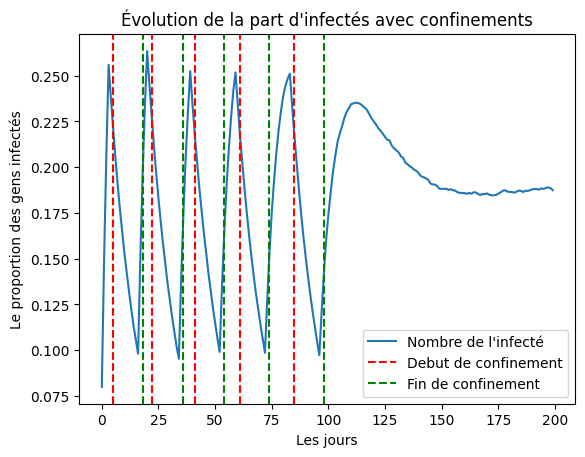

In [43]:
simulation_confinement(100000, 200)

3. Combien de confinements/deconfinements sont nécessaires ?

Le graphique ci-dessus illustre l'évolution de la proportion d'individus infectés au sein de la population, avec les périodes de confinement marquées en rouge pour leur début et en vert pour leur fin. On observe généralement qu'entre 4 et 5 confinements sont nécessaires avant que la proportion d'infectés ne commence à se stabiliser en dessous de 20%, sans jamais dépasser les 25%.

Une observation intéressante émerge lorsqu'on retire le mécanisme de confinement : la proportion d'infectés atteint une stabilisation plus rapide, mais après avoir atteint un pic d'infection considérable, approchant les 40%. La vitesse de convergence du modèle est directement liée au nombre d'individus ayant récupéré, présentant ainsi des chances moindres d'être infectés. Lorsque la majorité de la population est dans cet état, la proportion d'infectés tend à stagner. Les confinements ralentissent cette convergence tout en garantissant la maîtrise des pics d'infection.

# 5 Discussion
1. Quelles remarques critiques pouvez faire sur les modèles utilisés ?

Le modèle présente des limitations significatives :

- **Catégorisation incomplète :** Il ignore des catégories importantes telles que les individus infectés mais non encore contagieux et ceux décédant de la maladie, négligeant ainsi le degré de contagiosité et la mortalité.

- **Absence de facteurs environnementaux :** Il ne prend pas en compte l'influence des facteurs environnementaux sur la propagation de la maladie, comme l'exposition des individus contaminés à une population saine. Par conséquent, il ne permet pas d'évaluer l'impact de mesures telles que la quarantaine ou la sur-exposition aux facteurs de risques. 

Ces simplifications limitent la capacité du modèle à refléter fidèlement la complexité du système réel et à fournir des résultats applicables dans des situations concrètes. Des améliorations sont nécessaires pour renforcer sa pertinence.


2. Optionnel : Proposez des améliorations et implémentez-les si possible.

Pour améliorer le modèle, voici quelques suggestions et implémentations possibles :

- **Introduction de nouveaux états :** Ajoutez de nouvelles catégories pour refléter des situations plus réalistes. Par exemple, une catégorie pour les personnes infectées mais en période d'incubation, celles décédant de l'épidémie, celles développant une immunité en guérissant, celles porteuses de la maladie sans symptômes, etc.

- **Considération de facteurs de contagiosité :** Intégrez des facteurs tels que l'âge ou d'autres caractéristiques influençant la contagiosité. Par exemple, un jeune enfant peut transmettre plus facilement un virus, tandis qu'une personne âgée a souvent une forme grave de la maladie.

- **Prise en compte des contacts et déplacements :** Élargissez le modèle pour inclure les contacts entre individus, les déplacements, et d'autres facteurs environnementaux. Cela peut aider à mieux modéliser la propagation du virus dans des scénarios réels.

Il est à noter que ces améliorations nécessitent des ajustements significatifs du modèle initial et peuvent impliquer des données plus détaillées. La complexité du modèle augmentera en conséquence, mais les résultats seront plus représentatifs de la réalité. La mise en œuvre de ces suggestions dépendra de la disponibilité des données et des ressources nécessaires.